In [88]:
# Import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Core-pan analysis
- Based on similarity/core level
- Different represenations
- Similarity is defined as the number of samples in each path (counting each sample only once)
    - Only one path -> "1"
    - 2 < x > len(samples)
    - len(samples) == core

# All chromosomes together

In [89]:
fpath = "../results/core/"

In [90]:
chrom = [1,2,3,4,5]

In [91]:
dfs = []
dfs2 = []


for x in chrom[1:]: 
    # Read the file
    ftemp = fpath + "/chr" + str(x) + ".gfastats.core.txt"
    df = pd.read_csv(ftemp, sep = "\t", index_col = 0)
    
    split_index = [i for i, x in enumerate(df.index) if x == "1"][0]
    split_index
    
    # Check what is going on
    df_seq = df.iloc[split_index:, :]
    
    df_seq2 = df.iloc[:split_index-1, :]
    df_seq2 = df_seq2.sort_values("Sequence[bp]")
    df_seq2.index = [x.split("_")[0] for x in df_seq2.index]
    
    

    dfs.append(df_seq)
    dfs2.append(df_seq2)




In [92]:
merged_df = pd.concat(dfs, axis=0, ignore_index=False)
merged_df2 = pd.concat(dfs2, axis=0, ignore_index=False)

In [93]:
merged_df_sum = merged_df.groupby(merged_df.index, axis=0).sum()
merged_df_sum.index = merged_df_sum.index.astype(int)
merged_df_sum = merged_df_sum.sort_index()
merged_df_sum.to_csv("data_created/core/similarity.txt", sep = "\t")
merged_df_sum_red = merged_df_sum.drop(1)
merged_df_sum_red.head()

,Sequence[bp],#Node
Feature,,
2,14705602,991950
3,7876851,585772
4,5595399,427510
5,3727281,326331
6,2883844,265881


In [94]:
merged_df2_sum = merged_df2.groupby(merged_df2.index, axis=0).sum()
merged_df2_sum = merged_df2_sum.sort_values("Sequence[bp]")
merged_df2_sum.to_csv("data_created/core/similarity.private.txt", sep = "\t")

merged_df2_sum.head()

,Sequence[bp],#Node
6909,283476,5548
TAIR10,427822,3884
10015,880978,38144
22006,966369,62486
9888,1000669,79567


FileNotFoundError: [Errno 2] No such file or directory: 'plots/pancore/pancore.seq.png'

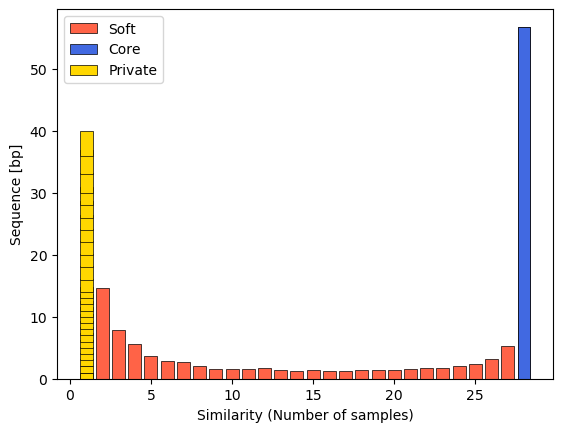

In [95]:
# This is the plot for one chromosome (sequence)
plt.bar([int(x) for x in merged_df_sum_red.index], merged_df_sum_red["Sequence[bp]"]/1000000, edgecolor = "black", linewidth = 0.5, color = "tomato", label = "Soft")
plt.bar([int(x) for x in merged_df_sum_red.index][-1], merged_df_sum_red["Sequence[bp]"].values[-1]/1000000, edgecolor = "black", linewidth = 0.5, color = "royalblue", label = "Core")

bottom1 = 0
for x in merged_df2_sum.iterrows():
    plt.bar(1, (x[1]["Sequence[bp]"]/1000000), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5)
    bottom1 += int(x[1]["Sequence[bp]"]/1000000)
plt.bar(1, (x[1]["Sequence[bp]"]/1000000), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5, label = "Private")

plt.ylabel("Sequence [bp]")
plt.legend()
plt.xlabel("Similarity (Number of samples)")
plt.savefig("plots/pancore/pancore.seq.png", dpi = 400)
plt.savefig("plots/pancore/pancore.seq.pdf")

In [ ]:
# This is the plot for one chromosome (Node)
plt.bar([int(x) for x in merged_df_sum_red.index], merged_df_sum_red["#Node"], edgecolor = "black", linewidth = 0.5, color = "tomato", label = "Soft")
plt.bar([int(x) for x in merged_df_sum_red.index][-1], merged_df_sum_red["#Node"].values[-1], edgecolor = "black", linewidth = 0.5, color = "royalblue", label = "Core")

bottom1 = 0
for x in merged_df2_sum.iterrows():
    plt.bar(1, (x[1]["#Node"]), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5)
    bottom1 += int(x[1]["#Node"])
plt.bar(1, (x[1]["#Node"]), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5, label = "Private")

plt.ylabel("#Nodes")
plt.legend()
plt.xlabel("Similarity (Number of samples)")
plt.savefig("plots/pancore/pancore.node.png", dpi = 400)
plt.savefig("plots/pancore/pancore.node.pdf")

In [ ]:
merged_df2_sum

In [ ]:
merged_df_sum.sum()

In [ ]:
# Get the different amounts (sequence)
private = merged_df_sum["Sequence[bp]"].values[0]
soft = sum(merged_df_sum["Sequence[bp]"].values[1:-1])
core = merged_df_sum["Sequence[bp]"].values[-1]
print(private, soft, core)
print(sum([private, soft, core]))
stotal = [private, soft, core]

In [ ]:
# Plot the pie
plt.pie([private, soft, core], autopct='%1.1f%%', startangle=140,
       wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1.5,
                      'antialiased': True}, colors = ["Gold", "Tomato", "Royalblue"],
        pctdistance=1.2); 
plt.savefig("plots/pancore/pie.total.seq.png", dpi = 400)
plt.savefig("plots/pancore/pie.total.seq.pdf")

In [ ]:
# Get the different amounts (node)
node_private = merged_df_sum["#Node"].values[0]
node_soft = sum(merged_df_sum["#Node"].values[1:-1])
node_core = merged_df_sum["#Node"].values[-1]
print(node_private,node_soft, node_core)
ntotal = [node_private, node_soft, node_core]

In [ ]:
# Plot the pie
plt.pie([node_private, node_soft, node_core], autopct='%1.1f%%', startangle=140, 
              wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1.5,
                      'antialiased': True}, 
        colors = ["Gold", "Tomato", "Royalblue"],
        pctdistance=1.2)
plt.savefig("plots/pancore/pie.total.node.png", dpi = 400)
plt.savefig("plots/pancore/pie.total.node.pdf")

In [ ]:
# Normalize the values accordingly 
private_norm = merged_df_sum["Sequence[bp]"].values[0]/28
soft_norm = sum([x * ((i+2)/28) for i,x in enumerate(merged_df_sum["Sequence[bp]"].values[1:-1])])
core_norm = merged_df_sum["Sequence[bp]"].values[-1]
print(private_norm, soft_norm, core_norm)
snorm = [private_norm, soft_norm, core_norm]

In [ ]:
# Plot the pie
plt.pie([private_norm, soft_norm, core_norm], autopct='%1.1f%%', startangle=140,
       wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1.5,
                      'antialiased': True}, colors = ["Gold", "Tomato", "Royalblue"],
        pctdistance=1.2)
plt.savefig("plots/pancore/pie.acc.seq.png", dpi = 400)
plt.savefig("plots/pancore/pie.acc.seq.pdf")

In [ ]:
# Normalize the values accordingly 
private_norm = merged_df_sum["#Node"].values[0]/28
soft_norm = sum([x * ((i+2)/28) for i,x in enumerate(merged_df_sum["#Node"].values[1:-1])])
core_norm = merged_df_sum["#Node"].values[-1]
print(private_norm, soft_norm, core_norm)
nnorm = [private_norm, soft_norm, core_norm]

In [ ]:
# Plot the pie
plt.pie([private_norm, soft_norm, core_norm], autopct='%1.1f%%', startangle=140,
       wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1.5,
                      'antialiased': True}, colors = ["Gold", "Tomato", "Royalblue"],
        pctdistance=1.2)
plt.savefig("plots/pancore/pie.acc.node.png", dpi = 400)
plt.savefig("plots/pancore/pie.acc.node.pdf")

In [ ]:
p = pd.DataFrame([stotal, ntotal, snorm, nnorm])
p.columns = ["Private", "Soft", "Private"]
pindex = ["Sequence total", "Node total", "Sequence norm", "Node norm"]
p.to_csv("data_created/core/pie.csv", sep = "\t")